Python for Data Science

    During this workshop we will give an intro to 
    Reading in a dataset using Pandas
    Data manupulation using Pandas
    Inroduction/conversion to numpy
    simple visualizations
What is Annaconda?
    

Data source: https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.__version__

'0.10.0'

Numpy and Pandas are the premire data science packages for python.
The purpose of Pandas is because it brings in the functionality of a dataframe
This gives us a fast way to work with relational, or labeled data.
Let us look at how the basis of pandas works.

        Note: even though I will be mainly using Pandas for this exersize
        Pandas is actually built on top of Numpy
        Meaning a vast majority of the functions we will be covering,
        can be used just as easily in numpy
        
        To explain the differences between the two:
            Numpy is used for creating Arrays - These arrays can be any number of dimensions, but 
            they do not have column or index labels - Numpy is essentially a more efficient version
            of the List in Python.
            Pandas is used for dataframes - This is more organized data that has column names AND an
            index.  It is Numpy with a more mandatory structure.

## Import data

In [4]:
csv_file = "Youtube_CAvideos_clean.csv"
df = pd.read_csv(csv_file)
df.head(5)

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,False,False,False
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,False,False,False
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095828,132239,1989,17518,False,False,False
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,33523622,1634130,21082,85067,False,False,False


In [4]:
for col in df.columns:
    print (col)
#as we can see below, we have a dataframe, wmi9'h  ere we have labeled columns, and numbered rows.  
#This will allow us to quickly isolate rows or columns and perform operations on them quickly 

trending_date
title
channel_title
category_id
views
likes
dislikes
comment_count
comments_disabled
ratings_disabled
video_error_or_removed


## Clean / Format the data

### Shrink down the data with selected columns

In [7]:
# trim off columns we are not going to use for this workshop
df_simp = df[["channel_title", "category_id", "views", "likes", "dislikes", "comment_count","comments_disabled","ratings_disabled"]]
df_simp["category_id"] = df_simp["category_id"].apply(str)
df_simp

print (df_simp.dtypes)

channel_title        object
category_id          object
views                 int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
dtype: object


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Check values in columns and clean the messy data

The first manipulation we would want to make is only select columns we may want to work with, and ignore columns we do not. 

### Sort the data by categories

In [9]:
#To make our data more viewable, we will use the function dataframe.sort_values
#With this, we can first sort by make in alphabetic order (with the true flag), then sort HP and
#Highway MPG greatest to least, or reverse order, by setting ascending = to false!
df_sort = df_simp.sort_values(["views", "likes", "dislikes", "comment_count"], ascending=[False, False,False,False])
print(df_sort)
#look how readable our results are!

             channel_title category_id      views    likes  dislikes  \
5900     YouTube Spotlight          24  137843120  3014479   1602383   
5623     YouTube Spotlight          24  125431369  2912715   1545018   
5398     YouTube Spotlight          24  113876217  2811217   1470387   
5197     YouTube Spotlight          24  100911567  2656678   1353655   
34361  ChildishGambinoVEVO          10   98938809  3037318    161813   
...                    ...         ...        ...      ...       ...   
579              udearroba          27       1141        0         0   
20505             mart lat          24       1107       14         1   
18076      Toronto Raptors          17       1023       65         5   
18045         The National          25       1000       46        19   
34625             mart lat          24        733       10         4   

       comment_count  comments_disabled  ratings_disabled  
5900          817582              False             False  
5623          8

## Basic Statistical Analysis 

Now we are going to move into Visualizing and Analyzing our data!

    for this, we will be using a relatively new data vizualization package called Seaborn
    If you are familiar with Matplotlib, it is similar, but the difference is something that 
    takes 10 lines in matplotlib, can be done in 1 with seaborn, making it ideal for super 
    quick and easy visualizations.  To make it even better, its built to work with Pandas!
    Lets look at the example below to see how we can make a plot with a line of best fit
    In fact, it actually inherits a lot of what it does from matplotlib
    For example, in order to change the title, we will be calling a matplotlib function, not a 
    seaborn one!  

In [10]:
#Finally, what if in addition to colorful graphs, we want to know more about our data?
#Pandas again, comes to the rescue and makes it fairly simple to collect numbers
all_stats = df_sort.describe()
df_sort.describe()
#As you can see, this aggregates all of our car data, and tells us about it in general.
#What if we want to drilldown by a specific category?  

,views,likes,dislikes,comment_count
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [18]:
#let's review the categories and see what we got here.
categories = df_sort.category_id.unique()
# print (categories)

# for i in df_sort.category_id:
#     print (type(i))
    
a =df_sort["category_id"].value_counts()
print (a)

#let's select a subcategory to focus on
cat_24 = df_sort[df_sort["category_id"]=="24"]
#print (cat_24)

cat_list=["24","28","17","10"]
cats =df_sort.loc[df_sort["category_id"].isin(cat_list)]
print (cats)

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64
             channel_title category_id      views    likes  dislikes  \
5900     YouTube Spotlight          24  137843120  3014479   1602383   
5623     YouTube Spotlight          24  125431369  2912715   1545018   
5398     YouTube Spotlight          24  113876217  2811217   1470387   
5197     YouTube Spotlight          24  100911567  2656678   1353655   
34361  ChildishGambinoVEVO          10   98938809  3037318    161813   
...                    ...         ...        ...      ...       ...   
19139              Canucks          17       1392       25         0   
16895  Toronto Maple Leafs          17       1369       52         0   
20505             mart lat          24       1107       14         1   
18076      Toronto Raptors          17      

In [15]:
#Lets look again at Audi to further analyze their data
cat_24_stats= cat_24.describe()
cat_24_stats
#This is cool and all, but I need something to compare it to!

,views,likes,dislikes,comment_count
count,1.345100e+04,1.345100e+04,1.345100e+04,13451.000000
mean,1.016372e+06,2.878934e+04,1.917447e+03,4112.187644
std,3.706464e+06,1.083120e+05,2.933067e+04,20807.588180
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000
25%,1.465485e+05,1.869000e+03,9.000000e+01,320.000000
50%,3.461660e+05,6.208000e+03,2.600000e+02,1038.000000
75%,8.257125e+05,1.970350e+04,7.605000e+02,2931.000000
max,1.378431e+08,3.014479e+06,1.602383e+06,827755.000000


In [17]:
#So say we want to further analyze the data by figuring out how cat_24 compares to all categories
#In Pandas, if 2 dataframes or columns match, pandas will automatically just subtract each one in order
stat_differential = cat_24_stats - all_stats
#Since the means will tell us the most, let us select the mean column and print it!
print(stat_differential.loc["mean"])

views           -130664.227718
likes            -10793.346706
dislikes            -91.748192
comment_count      -930.787063
Name: mean, dtype: float64


## Visualization

In [20]:
for col in cats:
    print (col)

channel_title
category_id
views
likes
dislikes
comment_count
comments_disabled
ratings_disabled


Text(0.5, 1, 'Youtube Videos Views vs. Comment Counts')

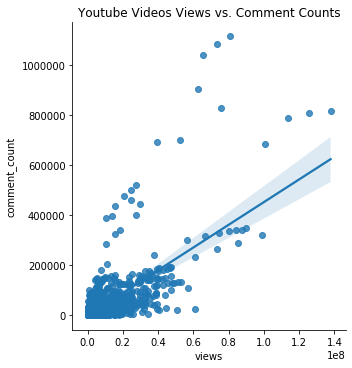

In [21]:
#so we renamed seaborn as sns.  Now let is call sns.lmplot, which stands for linear model plot
#It will include both our X and Y scatterplot, and automatically 
sns.lmplot(x="views", y="comment_count",  data=cats)  
plt.title('Youtube Videos Views vs. Comment Counts') 
#As you can see, we created a beautiful viz with only 1 line of code, and needed   
# one more to add a title!  That is powerful.

Text(0.5, 1, 'Youtube Videos Views vs. Dislikes')

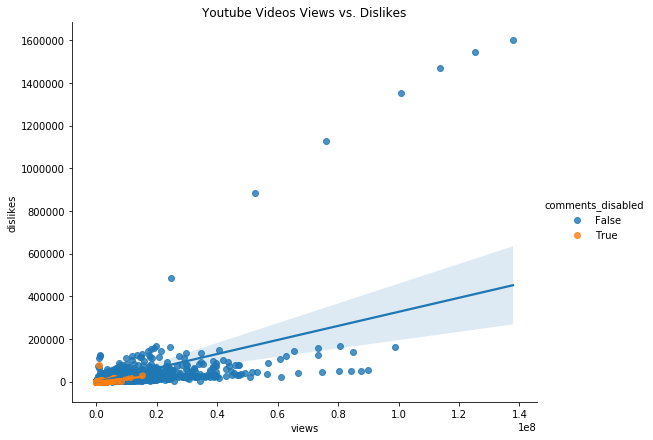

In [22]:
#But wait, seaborn has more.  Lets say instead of 1 line of best fit, we want to see how
#mileage improves as years pass.  This can easily be done with "Hue" which will color our 
#graph easily based on a categorical variable.  
g = sns.lmplot(x="views", y="dislikes", hue="comments_disabled", height=6, aspect=1.3, data=cats, legend="full")
plt.title('Youtube Videos Views vs. Dislikes')

#In addition, lets learn how to save this graph!
# g.savefig('Test.png')

#This graph makes it clear to see that as years go on, mileage improves regardless of horsepower!

Seaborn doesn't just make scatterplots!  it has over 30 different plots!

        To play with the boxplot functionaility, lets look at the example below
        Where we will look at the difference in Horsepower from some top brands

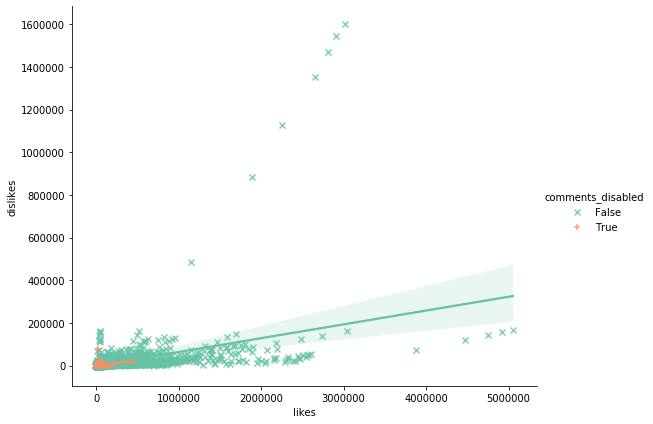

In [14]:
sns.lmplot(x="likes", y="dislikes", hue="comments_disabled", data=cats, markers=["x", "+"], palette="Set2", height=6, aspect=1.3)

### Scatter plots

* `catplot()`
* `stripplot()`
* `swarmplot()`

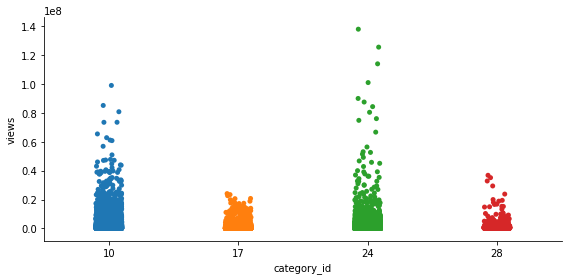

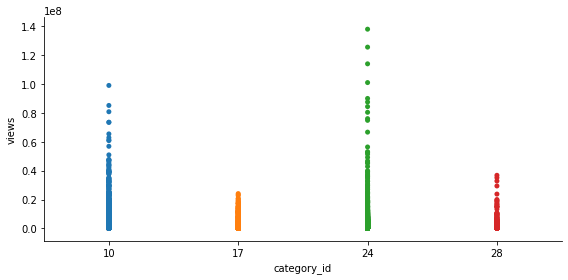

In [16]:
g1= sns.catplot(x="category_id", y="views", data=cats, height=4, aspect=2) # Standard Strip Plot
g2= sns.catplot(x="category_id", y="views",jitter=False, data=cats, height=4, aspect=2) # Removes random X-axis noise

# plt.setp(gl.lines, alpha=.3)       #for the lines

In [23]:
df_swarm=cats.head(1000)

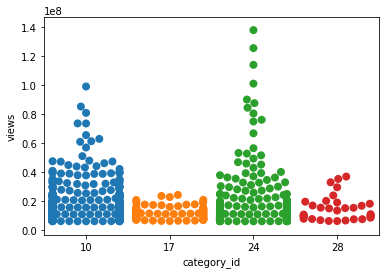

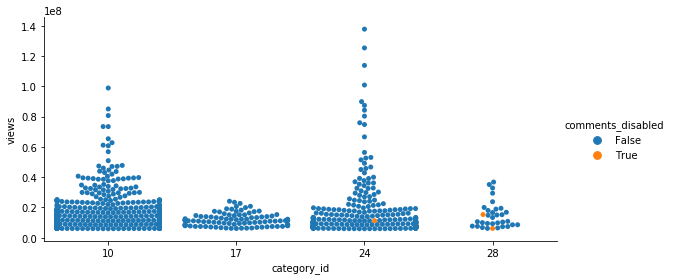

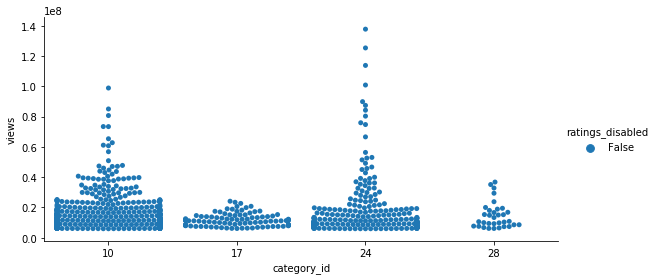

In [18]:
sns.swarmplot(x="category_id", y="views", data=df_swarm, size=8)

sns.catplot(x="category_id", y="views", kind="swarm",hue="comments_disabled", data=df_swarm, height=4, aspect=2) # Swarm Plot
sns.catplot(x="category_id", y="views", kind="swarm",hue="ratings_disabled", data=df_swarm, height=4, aspect=2) # Recolors to add a new dimension

### Distribution plots

* `boxplot()`
* `violinplot()`
* `boxenplot()`

In [24]:
df_cat = cats[:700]
# df_cat['polar_ratio'] = df_cat['dislikes']/df_cat['likes'] 
df_cat = df_cat[df_cat["comments_disabled"]==False]

df_cat.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,polar_ratio
5900,YouTube Spotlight,24,137843120,3014479,1602383,817582,False,False,0.531562
5623,YouTube Spotlight,24,125431369,2912715,1545018,807558,False,False,0.530439
5398,YouTube Spotlight,24,113876217,2811217,1470387,787174,False,False,0.523043
5197,YouTube Spotlight,24,100911567,2656678,1353655,682890,False,False,0.509529
34361,ChildishGambinoVEVO,10,98938809,3037318,161813,319502,False,False,0.053275


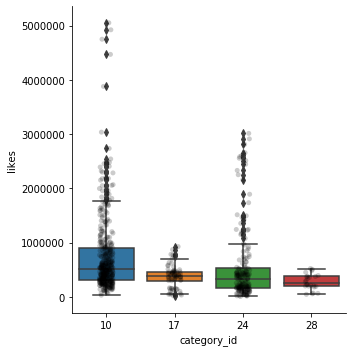

In [29]:
sns.catplot(x="category_id", y="likes", kind="box", data=df_cat)
sns.stripplot(x="category_id", y="likes", data=df_cat, alpha=0.2,jitter=0.1,color='k')

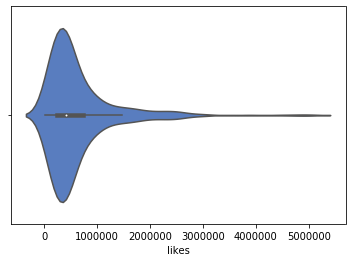

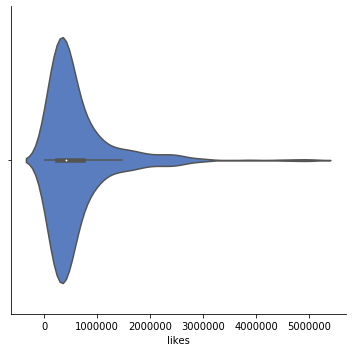

In [32]:
sns.violinplot(x="likes", palette="muted", data=df_cat)
sns.catplot(x="likes", palette="muted", kind="violin", data=df_cat)
# sns.catplot(x="likes", y="category_id",  kind="violin",  split=True, inner="stick", data=df_cat)

## Estimate Plots
* `pointplot()`
* `barplot()`
* `countplot()`

barplots and countplots are simpler ways of implementing the same functions as a bar catplot, what you need (control vs simlicity) determines which one you pick.

In [22]:
# sns.catplot(x="category_id", kind="swarm", palette="ch:.25", data=cats, height=4, aspect=2) #hue="",

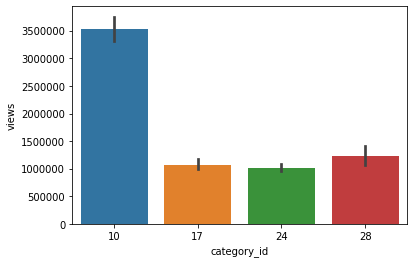

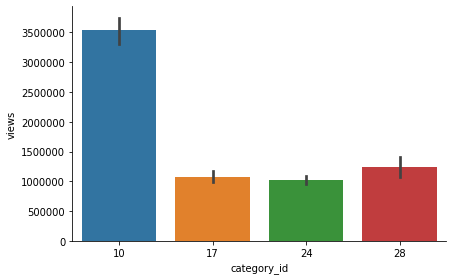

In [37]:
sns.barplot(x="category_id", y="views", data=cats)
sns.catplot(x="category_id", y="views", kind="bar", data=cats, height=4, aspect=1.6)

# by default these black lines represent our confidence interfval, which we can remove with "ci=None".
# the default uses the standard deviation

## Regressions

Two main functions in seaborn to visualize a linear relationship as determined through regression are regplot() and lmplot(). They share much of  core functionality: both plots draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

Differences: 
1. regplot() accepts the x and y variables in a variety of formats, lmplot() has data as a required parameter and the x and y variables must be specified as strings
2. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

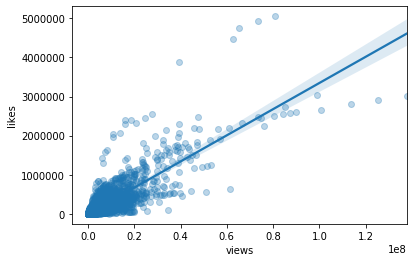

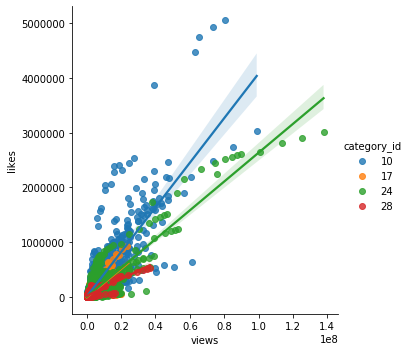

In [24]:
sns.regplot(x="views", y="likes", data=cats, scatter_kws={'alpha':0.3})
sns.lmplot(x="views", y="likes", hue="category_id", data=cats)

Other than the shape of our charts `sns.regplot()` and `sns.lmplot()` create some similar linear regressions. Thats normal as `sns.regplot()` combines `sns.regplot()` with a `FacetGrid`. This basically means with `sns.lmplot()` we can explore relationships between more than two variables.

And exploring different variables...

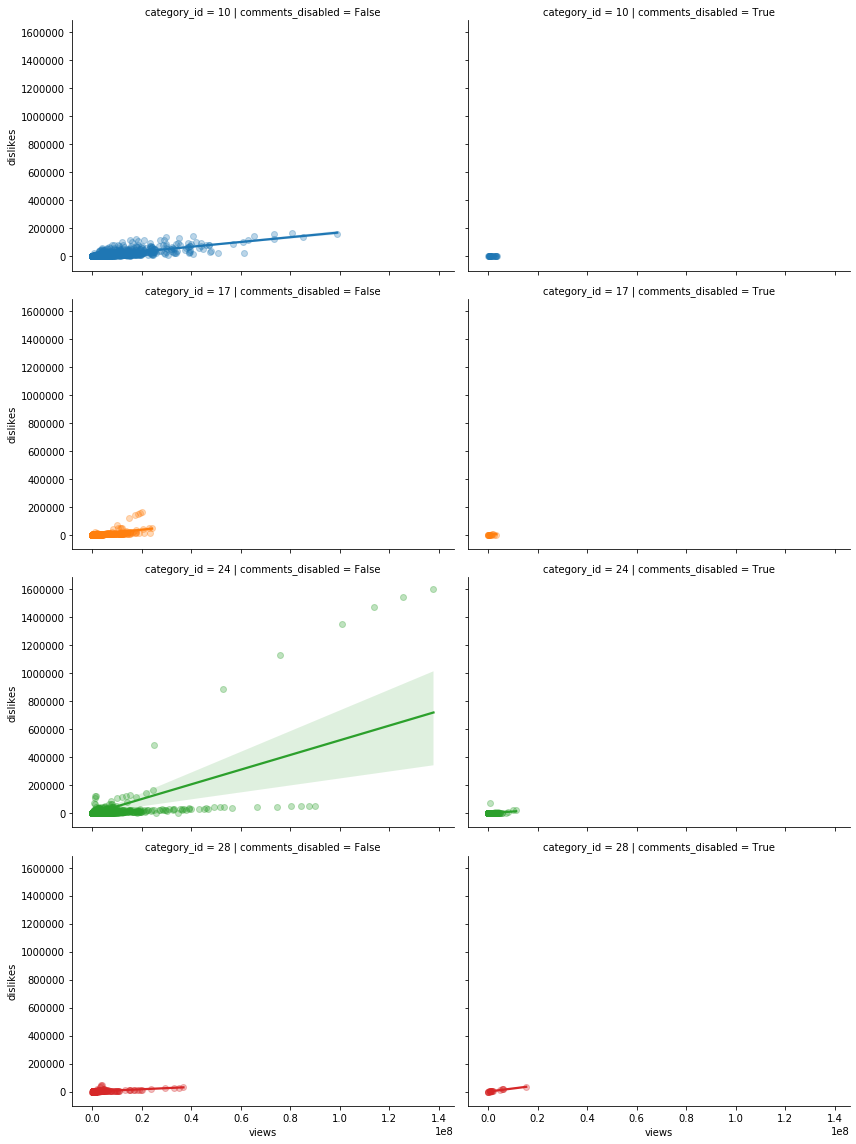

In [25]:
# sns.lmplot(x="Reviews", y="Installs_new", hue="Rating_levels", data=games_social, markers=["o", "1","x","2","3"], palette="Set1")
sns.lmplot(x="views", y="dislikes", data=cats, hue="category_id", row="category_id",col="comments_disabled", scatter_kws={'alpha':0.3}, height=4, aspect=1.5)
#x_jitter=0.2, y_jitter=0.2, markers=["o", "1","x","2"],palette="Set1", col="comments_disabled", row= "ratings_disabled",

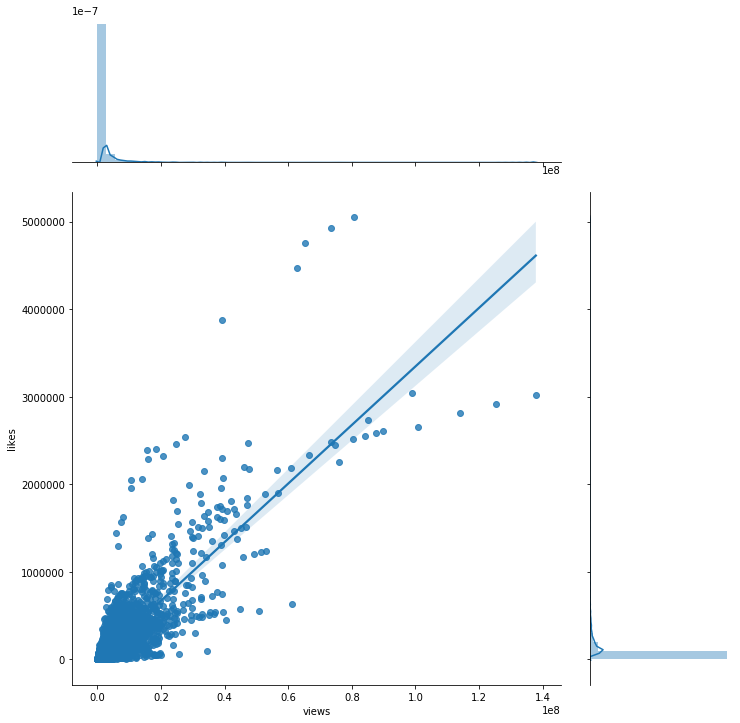

In [26]:
# sns.lmplot(x="Reviews", y="Installs_new", hue="Rating_levels", data=games_social, markers=["o", "1","x","2","3"], palette="Set1")

sns.jointplot(x="views", y="likes", data=cats, kind="reg", height=10, ratio=3) #kind: 'scatter', 'reg', 'resid', 'kde', or 'hex'


Sometimes we have data where a linear regression doesnt quite make sense though:

### Nonlinear Regressions

In [ ]:
# anscombe = sns.load_dataset("anscombe")
# sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)
sns.lmplot(x="views", y="comment_count", data=cats, x_estimator=np.mean, logx=True)

This concludes the lesson

        In this we went through
            The basics of filtering in Pandas
            Syntax for numpy and pandas
            Advanced dataframe creation techniques
            Beautiful vizualizations using Seaborn
            Computing Statistics in Pandas

https://seaborn.pydata.org/api.html